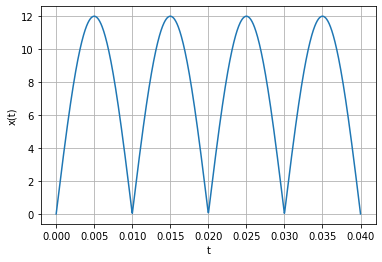

In [1]:
import numpy as np
from matplotlib import pyplot as plt


A = 12
f = 50
t = np.linspace(0, 2/f, 1000)
plt.plot(t, np.abs(A*np.sin(2*np.pi*f*t)))
plt.grid()
plt.xlabel('t')
plt.ylabel('x(t)')
plt.savefig('1_1.png')


/home/pratyaksh/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


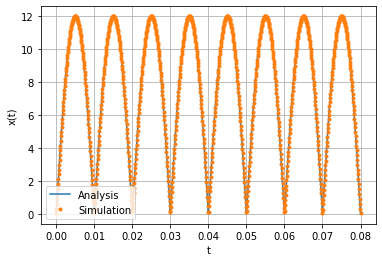

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import os

A = 12
f = 50
N = 1000
t = np.linspace(0, 4/f, N)
B = np.ones(N) + 1j*np.zeros(N)

def acc_cos(k):
    global B
    acc = (np.exp(-1j*2*np.pi*f*k*t) + np.exp(1j*2*np.pi*f*k*t))/(1 - k**2)
    B += acc

acc_vec = np.vectorize(acc_cos, otypes=['double'])
K = np.linspace(2, 100, 50)
acc_vec(K)
plt.plot(t, np.abs(A*np.sin(2*np.pi*f*t)))
plt.plot(t, 2*A*B/np.pi, '.')
plt.legend(['Analysis', 'Simulation'])
plt.grid()
plt.xlabel('t')
plt.ylabel('x(t)')
plt.savefig('2_3.png')


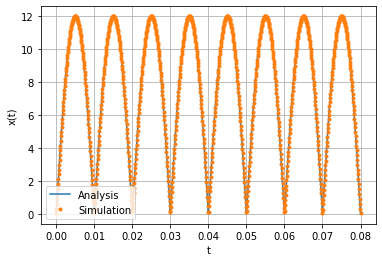

In [3]:
import numpy as np
from matplotlib import pyplot as plt


A = 12
f = 50
N = 1000
t = np.linspace(0, 4/f, N)
B = np.ones(N)*2*A/np.pi

def acc_cos(k):
    global B
    acc = 4*A*np.cos(2*np.pi*f*k*t)/(np.pi*(1 - k**2))
    B += acc

acc_vec = np.vectorize(acc_cos, otypes=['double'])
K = np.linspace(2, 100, 50)
acc_vec(K)
plt.plot(t, np.abs(A*np.sin(2*np.pi*f*t)))
plt.plot(t, B, '.')
plt.legend(['Analysis', 'Simulation'])
plt.grid()
plt.xlabel('t')
plt.ylabel('x(t)')
plt.savefig('2_6.png')

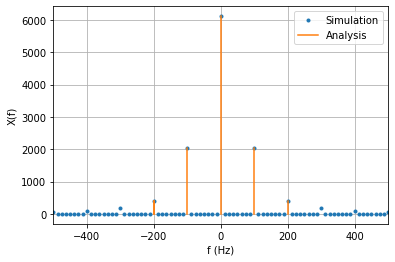

In [4]:
import numpy as np
from scipy import fft
from matplotlib import pyplot as plt


A = 12
f = 50
scl = 400
def ddf(k):
    mag = 4*A/(np.pi*(1-k**2))
    plt.plot([f*k, f*k], [0, scl*np.abs(mag)], 'C1')

ddf_vec = np.vectorize(ddf)
ts = 1e-4
t = np.arange(-2/f, 2/f, ts)
sig = A*np.abs(np.sin(2*np.pi*f*t))
sig_fft = fft.fft(sig)
sampl_freq = fft.fftfreq(sig.size, d=ts)
plt.plot(sampl_freq, np.abs(sig_fft), 'C0.')
ddf_vec([-4, -2, 0, 2, 4])
plt.grid()
plt.xlim(-10*f, 10*f)
plt.xlabel('f (Hz)')
plt.ylabel('X(f)')
plt.legend(['Simulation', 'Analysis'])
plt.savefig('3_8.png')


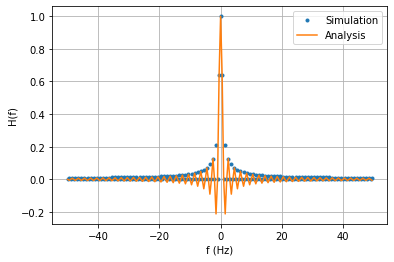

In [6]:


import numpy as np
from scipy import fft, signal
from matplotlib import pyplot as plt

ts = 1e-2
sig = np.zeros(200)
sig[:100] = 1
sig_fft = fft.fftshift(fft.fft(sig))
sig_fft = np.abs(sig_fft)/max(np.abs(sig_fft))
sf = fft.fftshift(fft.fftfreq(sig.size, d=ts))
plt.plot(sf, sig_fft, '.')
plt.plot(sf, np.sinc(sf))
plt.legend(['Simulation', 'Analysis'])
plt.grid()
plt.xlabel('f (Hz)')
plt.ylabel('H(f)')
plt.savefig('3_9.png')


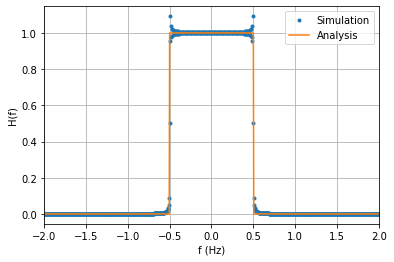

In [7]:
import numpy as np
from scipy import fft, signal
from matplotlib import pyplot as plt
import os

def rect_smpl(x): return 1 if (np.abs(x) <= 0.5) else 0
rect = np.vectorize(rect_smpl, otypes=['double'])

ts = 2e-4
N = 100
mid = int(N/ts)
sig = np.sinc(np.arange(-N, N, ts))
sig_fft = fft.fftshift(fft.fft(sig))
sig_fft = np.abs(sig_fft)/np.abs(sig_fft[mid])
sf = fft.fftshift(fft.fftfreq(sig.size, d=ts))
plt.plot(sf, sig_fft, '.')
plt.plot(sf, rect(sf))
plt.legend(['Simulation', 'Analysis'])
plt.grid()
plt.xlim(-2, 2)
plt.xlabel('f (Hz)')
plt.ylabel('H(f)')
plt.savefig('3_10.png')


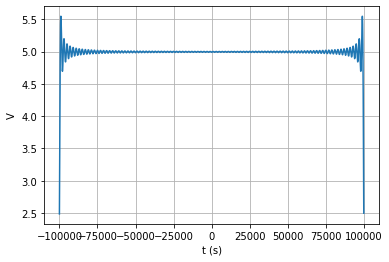

In [8]:
import numpy as np
from matplotlib import pyplot as plt

f = 50
V = 5
A = 12
N = 100000
fc = 100
tp = 100000
t = np.linspace(-tp, tp, N)
s1 = fc*np.sinc(fc*t)
s2 = A*np.abs(np.sin(2*np.pi*f*t))
sc = np.convolve(s1, s2, mode='same')
plt.plot(t, sc*(np.pi*V/(2*A))*(2*tp/N))
plt.grid()
plt.xlabel('t (s)')
plt.ylabel('V')
plt.savefig('4_3.png')

Note: No ".plot", ".print", or ".fourier" lines; no simulations run



No compatibility mode selected!


Circuit: amplitude response of butterworth filter

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 31


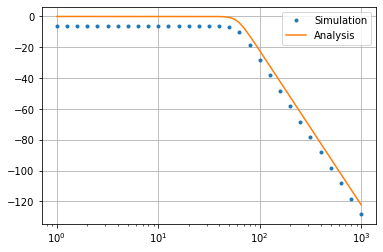

In [11]:
import numpy as np
from matplotlib import pyplot as plt
import os
from scipy import signal

os.system('cat 5_3.cir | ngspice')
A = np.loadtxt('resp_butter.txt')
n = 5
fc = 60
b, a = signal.butter(n, fc, analog=True)
f, h = signal.freqs(b, a)
plt.plot(A[:,0], A[:,1], '.')
plt.semilogx(f, 20*np.log10(np.abs(h)))
plt.grid()
plt.legend(['Simulation', 'Analysis'])
plt.savefig('5_3.png')


Note: No ".plot", ".print", or ".fourier" lines; no simulations run



No compatibility mode selected!


Circuit: amplitude response of chebyshev filter

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 31


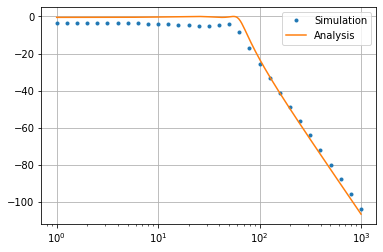

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

os.system('cat 5_4.cir | ngspice')
A = np.loadtxt('resp_cheby.txt')
n = 4
fc = 60
rp = 0.5
b, a = signal.cheby1(n, rp, fc, analog=True)
f, h = signal.freqs(b, a)
plt.plot(A[:,0], A[:,1], '.')
plt.semilogx(f, 20*np.log10(np.abs(h)))
plt.grid()
plt.legend(['Simulation', 'Analysis'])
plt.savefig('5_4.png')
